In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# Функция для расчета LTV
def calculate_ltv(lifetime_days, daily_revenue, discount_rate):
    """Вычисление LTV для пользователя.
    
    Args:
        lifetime_days (int): Время жизни пользователя в днях.
        daily_revenue (float): Ежедневный доход.
        discount_rate (float): Дисконтная ставка.
    
    Returns:
        float: Lifetime Value (LTV).
    """
    ltv = 0
    for t in range(1, int(lifetime_days) + 1):
        ltv += daily_revenue / ((1 + discount_rate) ** t)
    return ltv

In [30]:
# Загрузка данных
data_path = "../data/ltv_data.csv"
data = pd.read_csv(data_path)

In [31]:
try:
  data.index = data['user_id']
  data.drop(columns=['user_id'], inplace=True)
  # data['lifetime_days'] = data['lifetime_days'].astype(float)
except:
  print('changes done earlier')

In [40]:
# Расчет LTV для каждого пользователя
data["LTV"] = data.apply(
    lambda row: calculate_ltv(row["lifetime_days"], row["daily_revenue"], row["discount_rate"]),
    axis=1
)

In [42]:
data

,lifetime_days,daily_revenue,discount_rate,LTV
user_id,,,,
1,281,9.06,0.03,301.925399
2,261,4.37,0.02,217.256039
3,137,7.97,0.05,159.200678
4,24,9.51,0.05,131.225083
5,142,6.53,0.02,306.881816
...,...,...,...,...
496,364,1.08,0.02,53.960012
497,392,6.33,0.03,210.998041
498,477,4.77,0.04,119.249999


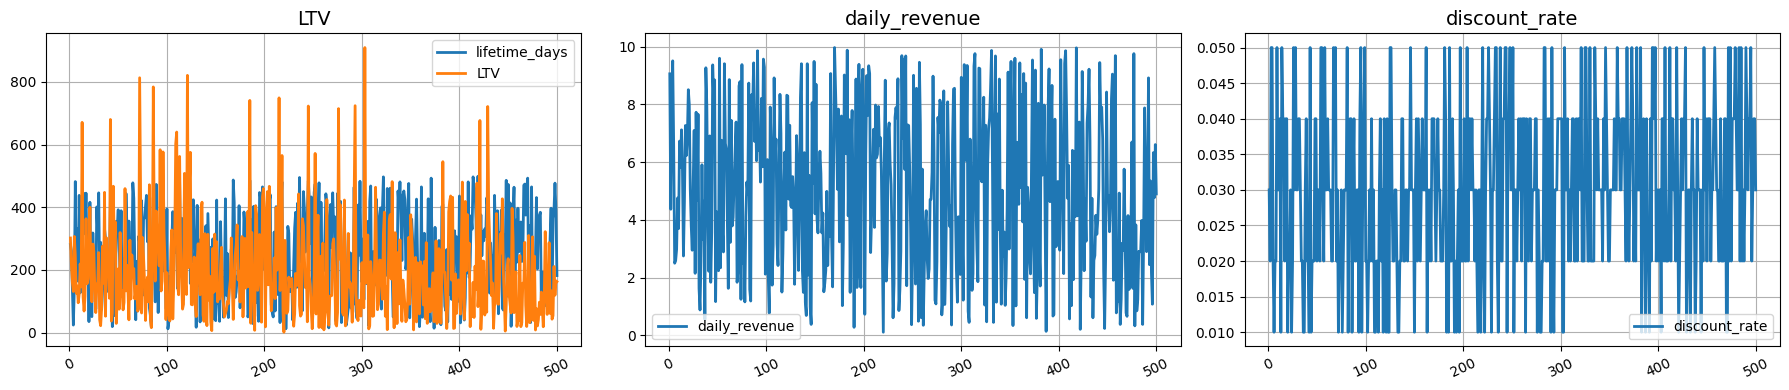

In [47]:
# Создание графиков
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Линии метрик DAU, WAU, MAU
axes[0].plot(data.index, data['lifetime_days'], label='lifetime_days', linewidth=2)
axes[0].plot(data.index, data['LTV'], label='LTV', linewidth=2)
axes[0].set_title('LTV', fontsize=14)
axes[0].tick_params(axis='x', rotation=25)
axes[0].legend()
axes[0].grid(True)

# Линии коэффициентов вовлеченности
axes[1].plot(data.index, data['daily_revenue'], label='daily_revenue', linewidth=2)
axes[1].set_title('daily_revenue', fontsize=14)
axes[1].tick_params(axis='x', rotation=25)
axes[1].legend()
axes[1].grid(True)

axes[2].plot(data.index, data['discount_rate'], label='discount_rate', linewidth=2)
axes[2].set_title('discount_rate', fontsize=14)
axes[2].tick_params(axis='x', rotation=25)
axes[2].legend()
axes[2].grid(True)

# Оформление и отображение
plt.tight_layout()
plt.show()